In [2098]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [2099]:
df = pd.read_csv("./data/final_average_stats.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [2100]:
df.rename(columns = {"Pos": "POS", "Height": "HEIGHT", "Weight": "WEIGHT", "Age": "AGE", "zona5attempted": "zona5_attempted"}, inplace = True)

In [2101]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")
df["HEIGHT"] = df["HEIGHT"] * 0.3048

In [2102]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [2103]:
df.columns

Index(['PLAYER_NAME', 'Team', 'GP', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST',
       'STL', 'BLK', 'PTS', 'POS', 'HEIGHT', 'WEIGHT', 'AGE',
       'zona1_attempted', 'zona1_made', 'zona2_attempted', 'zona2_made',
       'zona3_attempted', 'zona3_made', 'zona4_attempted', 'zona4_made',
       'zona5_attempted', 'zona5_made', 'zona6_attempted', 'zona6_made',
       'zona7_attempted', 'zona7_made', 'zona8_attempted', 'zona8_made',
       'zona9_attempted', 'zona9_made', 'zona10_attempted', 'zona10_made',
       'zona11_attempted', 'zona11_made', 'zona12_attempted', 'zona12_made'],
      dtype='object')

In [2087]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

In [2104]:
df = df.loc[df["GP"] > 8]
df = df.loc[df["MIN"] > 10]

In [2105]:
df.fillna(0, inplace = True)

In [2106]:
df.drop_duplicates(subset = ["PLAYER_NAME"], inplace = True)

In [2107]:
X = df.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT", "AGE", "MIN","ORB","DRB","FGM", "FGA","3PM", "3PA","FTM", "FTA"])

### Hasta aquí todo bien

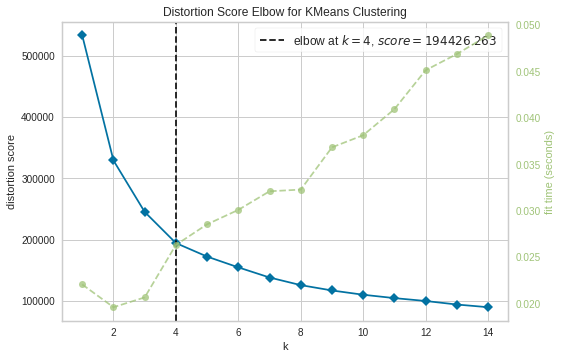

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2108]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [2109]:
nClust = 4
km = KMeans(n_clusters=nClust, init='random', n_init=10, random_state=0)
y_km = km.fit_predict(X)



In [2110]:
y_km

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 2, 1, 0,
       0, 1, 3, 2, 3, 1, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 2, 3, 2, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 2,
       1, 3, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 0, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 3, 0,
       3, 3, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3], dtype=int32)

In [2111]:
df['Cluster'] = y_km

In [2113]:
df["Cluster"] = df["Cluster"].astype(str)

In [2119]:
df["Cluster"] = df["Cluster"].str.replace("0", "Elite-Scorers").str.replace("1", "Playmakers").str.replace("2", "Role-Players").str.replace("3", "Big-Guys")


In [2120]:
df.to_csv("./data/clusters.csv")

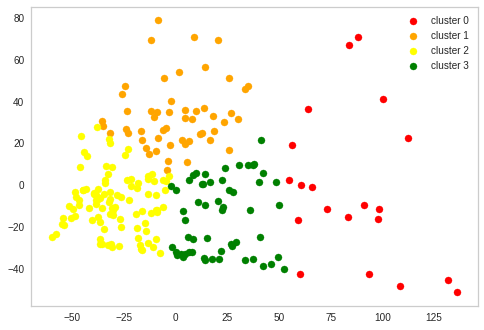

In [2011]:
# Visualization
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

colormaps = ["red", "orange", "yellow", "green", "blue", "black", 'lightgreen','dodgerblue','navy','mediumpurple','pink','hotpink','oldlace','aqua','slategrey','palegreen','m','indianred','orchid']

for iCluster in range(0, nClust):
    plt.scatter(principalComponents[y_km == iCluster, 0], principalComponents[y_km == iCluster, 1], s=50, c=colormaps[iCluster],  label='cluster '+ str(iCluster))
plt.legend(scatterpoints=1,loc='best')
plt.grid()
plt.show()